# Data Mining & Machine Learning: Intro to Scikit-Learn

*N. Hernitschek, 2022*

This is the tenth Jupyter notebook for **ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)**. 
This Jupyter notebook gives an introduction to the usage of scikit-learn.

It is based on code from the textbook

Statistics, Data Mining and Machine Learning in Astronomy: A Practical Python Guide for the Analysis of
Survey Data - Z. Ivezic, A. J. Connolly, J. T. VanderPlas, A. Gray

as well as 

which in turn draws in large part from https://github.com/jakevdp/ESAC-stats-2014/blob/master/notebooks/03.1-Scikit-Learn-Intro.ipynb.

***Exercises required for class participation are in <font color='red'>red</font>.***


---
## Contents
* [The scikit-learn Package](#first-bullet)
* [Basic Principles of Machine Learning](#second-bullet)
* [Supervised Learning](#third-bullet)





## 1. The scikit-learn Package <a class="anchor" id="first-bullet"></a>

scikit-learn is a popular Python package containing a collection of tools for machine learning.

It comes with an extensive list of tutorials, see http://scikit-learn.org/stable/tutorial/basic/tutorial.html#.

In general, we are interested in taking a set of samples of data and then predicting properties of unknown data. In the simplest case the data will be one dimensional, but generally we will be dealing with multi-dimensional data.

As we saw in the lecture, we can break machine learning into a few distinct categories. Common to all of these is the concept of **training sets and test sets**: training data will be used to make predictions about the test data.


### Representation of Data in Scikit-learn

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented in scikit-learn.

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a two-dimensional array or matrix. The arrays can be either numpy arrays, or in some cases `scipy.sparse matrices`. The size of the array is expected to be `[n_samples, n_features]`

`n_samples`: The number of samples: each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
    
`n_features`: The number of features or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. This is a case where `scipy.sparse` matrices can be useful, in that they are much more memory-efficient than numpy arrays.


### A Simple Example: the Iris Dataset

As an example of a simple dataset, we take a look at the iris data stored by scikit-learn. It is a commonly used example data set for machine learning algorithms. The data consists of measurements of three different species of irises. There are three species of iris in the dataset, which we can picture here:

The data come from measurements made in Quebec by botanist Dr. Edgar Anderson and first used for Sir Ronald Fisher's 1936 [classification paper](http://rcs.chemometrics.ru/Tutorials/classification/Fisher.pdf), see [https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set).


### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- **Features/attributes in the Iris dataset:**
  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm
  
  (The petal is the colorful "leaf" of a flower. The sepal is the green "leaf" at the bottom of a flower.)

Scikit-learn refers to the "labels" as "targets".  So, every time you see "target", just think "label" and it will make more sense.  
- **The target classes are:**
  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``Scikit-Learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [2]:
# Execute this cell
from sklearn.datasets import load_iris
iris = load_iris()

`iris` is a dictionary, so we can look at the "keys" of the dictionary as follows:

In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


* `target_names` were defined above
* `data` is the `[n_samples, n_features]` data array
* `target` is the list of labels for all of the entries in `data`
* `DESCR` is a README file with all of the information about the data set
* `feature_names` were defined above

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

We can query the database to determine the shape of the data and find that there are 150 objects with 4 measurements each:

In [5]:
print(iris.data.shape)
n_samples, n_features = iris.data.shape
print(n_samples, n_features)

(150, 4)
150 4


Now let's look at both the first entry in `data` and the full $N\times M$ data array. The first entry shows the values of the 4 features for the first object.

Note the structure of the full data array: It is an `n_samples` array of arrays with `n_features`.  Scikit-learn requires this exact format which isn't always what you would generate naturally (particulary in the case where we have only one feature).

In [6]:
print(iris.data[0])
print(iris.data)

[5.1 3.5 1.4 0.2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5

We can also inpect the shape of the target (labels) array, which is an `n_samples`-dimensional array, print the values of those labels, and also learn how those numerical values relate to the names of the iris species:

In [7]:
# The shape of the target (labels) array is just an n_samples X 1 array
print(iris.target.shape)

# Here we see that the labels are given numerical values
print(iris.target)

# Use target_names to translate those numerical values to names
print(iris.target_names)
print(iris.target_names[0])

(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
setosa


i.e., $0 = $ setosa, $1 = $ versicolor, and $2 = $ virginica.

This data is four-dimensional, so it's not easy to visualize. But we can visualize two of the dimensions
at a time using a simple scatter-plot.

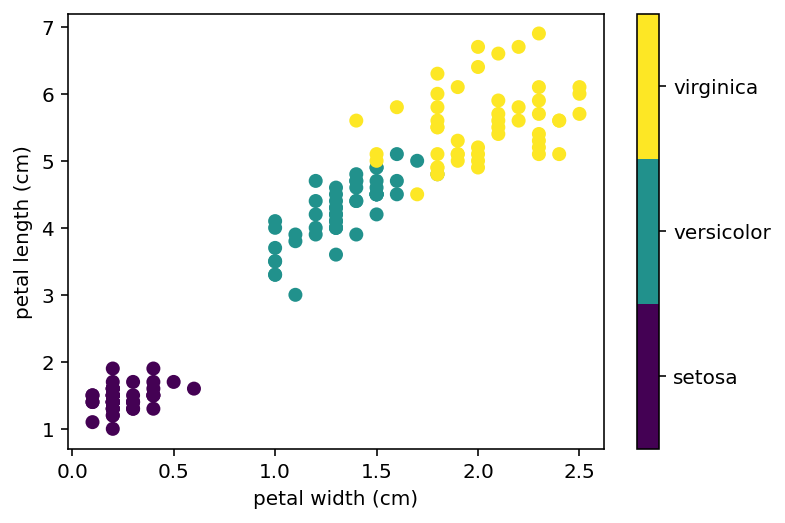

In [44]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np

x_index = 3
y_index = 2

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], 
            c=iris.target, cmap=plt.cm.get_cmap('viridis', 3))

plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);


<font color='red'>Change `x_index` and `y_index` in the above script and find a combination of two parameters that maximally separate the three classes.</font>

This exercise is a preview of **dimensionality reduction**, which we'll see later.

## Other Available Test Data

`scikit-learn` comes with a variety of test data:

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``
  

- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
  
  
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

You can explore the available dataset loaders, fetchers, and generators using IPython's
tab-completion functionality.  After importing the ``datasets`` submodule from ``sklearn`` (see cells below),
type

    datasets.load_ + TAB

or

    datasets.fetch_ + TAB

or

    datasets.make_ + TAB

to see a list of available functions.




In [45]:
from sklearn import datasets

In [46]:
# Type datasets.load_<TAB>  to see all possibilities
# A dropdown menu should appear.
datasets.load_wine

<function sklearn.datasets._base.load_wine(return_X_y=False)>

**in case this does not work:**
    
 **Quick software update:** Try the following task. In the cell below, place your cursor after `ls` and press `TAB`.
 If you see a dropdown menu of files and options then you don't need to do the pip installation.   
 
If nothing happens then execute the subsequent cell that will downgrade the `jedi` package. After you do the pip installation you will need to close down and re-open your Jupyter notebook. 

In [ ]:
!ls

In [ ]:
!pip3 install jedi==0.17.2

A similar interface to [datasets](http://www.astroml.org/examples/datasets/#) is available in ``astroML``:

In [47]:
from astroML import datasets

# Use tab completion to explore datasets
datasets.fetch_dr7_quasar

<function astroML.datasets.dr7_quasar.fetch_dr7_quasar(data_home=None, download_if_missing=True)>

## 2. Basic Principles of Machine Learning <a class="anchor" id="second-bullet"></a>

We can now continue with the basic principles of machine learning, and how to utilize them via Scikit-Learn.

After briefly introducing scikit-learn's ***Estimator*** object, we continue with an introduction to **supervised learning**, including ***classification*** and ***regression*** problems, and **unsupervised learning**, including ***dimensionality reduction*** and ***clustering*** problems.

### The Scikit-Learn Estimator Object

Every algorithm in scikit-learn generates an `Estimator` object. 

All the **parameters** of an estimator can be set when it is instantiated, and have suitable default values.  

Let's take for example a look at all of the parameters, attributes and methods in the [LinearRegression module](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

The ''Estimator'' object is implemented as follows for linear regression:


In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# Instantiate a LinearRegression estimator object, call it `model`
model = LinearRegression(normalize=True)

# Check an individual parameters
print(model.normalize)

# Check all of the parameters
print(model)

True
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


With our model instantiated, we are ready to input some data.  We make a simple test case:

In [50]:
x_train = np.arange(20)    # An array of 10 integers
y_train = 2 * x_train + 1  # Some operation performed on that array
print(x_train)
print(y_train)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39]


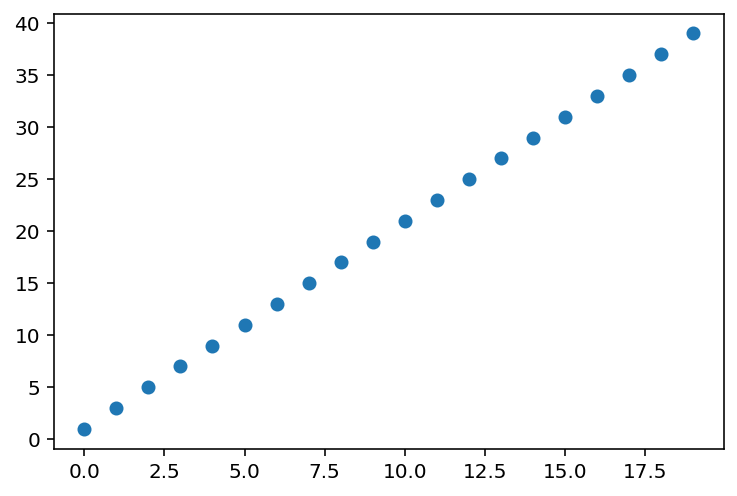

In [51]:
plt.plot(x_train, y_train, 'o');

Now we'd like to `fit` that data to determine the model parameters that we would need to `predict` the $y$ values of any new measurement of $x$.  

The general code syntax for this sort of thing might be

```
lsqfit x_train y_train x_test y_pred
```

Scikit-Learn breaks this into two steps:
1. **fitting**
2. **predicting**
    
where the syntax of the fit looks like:

In [32]:
# fit the model on our data
model.fit(x_train, y_train)

# caution: this will not work, as the input data must be 2D!

ValueError: Expected 2D array, got 1D array instead:
array=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [52]:
# The input data for sklearn must be 2D: (samples == N x features == 1)
print(x_train)

# All of these give the same result.  I'll adopt the convention from the last one.
print(x_train.reshape(-1,1))
print(x_train[:, np.newaxis])
print(np.atleast_2d(x_train).T)
print(x_train[:, None])

X = x_train[:, None]
y = y_train
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39]


In [53]:
# Now we can fit the model on our data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

**Estimated Model parameters**

All the estimated parameters are attributes of the estimator object ending with an *underscore*:



In [54]:
# Let's look at the fit parameters, which are indicated by an underscore at the end
print(model.coef_)
print(model.intercept_)

[2.]
0.9999999999999929



The model found a line with a slope 2 and intercept 1 (as expected).

## 3. Supervised Learning <a class="anchor" id="third-bullet"></a>


In **Supervised Learning**, we have a dataset consisting of both ***features*** and ***labels***. The task is to construct an estimator that is able to predict the label of an object given the set of features. A relatively simple example is predicting the species of iris given a set of measurements of its flower.

Some more complicated examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
  
  
- given a time series and its extracted features, determine which kind of variable star the object is.

The commonality of these tasks is that there are one or more unknown properties of an object to be determined from other observed quantities.

Supervised learning is further broken down into two categories, 
1. **classification** (discrete labels)
2. **regression** (continuous labels)

For example, the task of determining whether an object is a star, a galaxy, an asteroid or a quasar is a classification problem: the label is from three distinct categories. Estimating the age of an object based on such observations however would be a regression problem, because the label (age) is a continuous quantity.

### Classification Example

[K nearest neighbors (kNN)](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

We it out on our iris classification problem.  First see if you can do a kNN fit on the iris data using the 5 nearest neighbors.

In [55]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])


['versicolor']


We can also do probabilistic predictions:


In [57]:
print(knn.predict_proba([[3, 5, 4, 2],]))
print(iris.target_names)

[[0.  0.8 0.2]]
['setosa' 'versicolor' 'virginica']


<font color='red'>Can you output the name of the iris type along with the probability?</font>

(4.180808080808081, 8.019191919191918, 1.8868686868686868, 4.513131313131313)

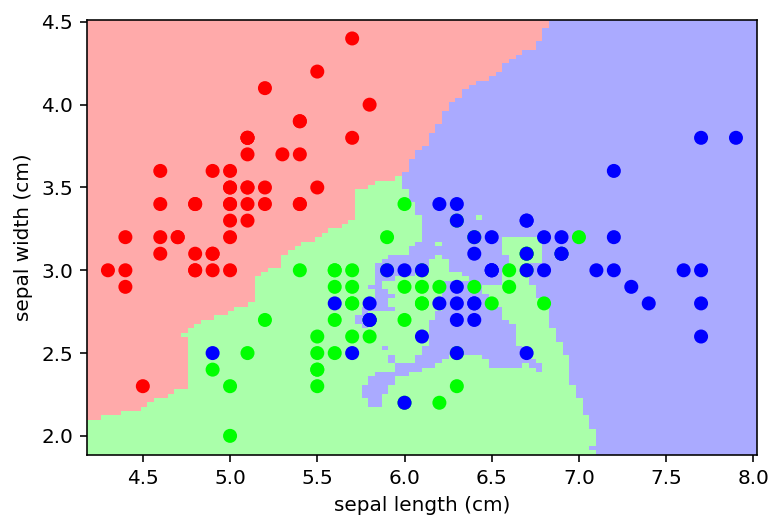

In [58]:
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                        # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure()
pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
pl.xlabel('sepal length (cm)')
pl.ylabel('sepal width (cm)')
pl.axis('tight')



## Model Validation

An important aspect of ML is **model validation**:
*determining how well your model will generalize from the training data to future unlabeled data.* 

Let's look at an example using the ***nearest neighbor classifier***. This is a very simple classifier. It stores all training data, and for any unknown quantity, simply returns the label of the closest training point.

With the iris data, it very easily returns the correct prediction for each of the input points:

In [59]:
from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)
print('Element-wise check: ' + str(y==y_pred))
print('All-at-once check: ' + str(np.all(y == y_pred))) # To check all at once.

Element-wise check: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
All-at-once check: True


See what happens if we used more than the first nearest neighbor.

A more useful way to look at the results is to view the **confusion matrix**, or the matrix showing the frequency of inputs and outputs:

In [60]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


Read each element of the matrix as "*the number of observations known to be in row-$i$ and predicted to be in column-$j$*".

For each of the three classes, all 50 training samples are correctly identified. But this **does not mean that our model is perfect!** In particular, such a model generalizes extremely poorly to new data. We can simulate this by splitting our data into a ***training set*** and a ***test set***. Scikit-learn contains some convenient routines to do this: here we will apply [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split):

In [61]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

[[14  0  0]
 [ 0 14  2]
 [ 0  0  8]]


This paints a better picture of the true performance of our classifier: apparently there is some confusion between the second and third species, which we might anticipate given what we've seen of the data above.

This is why it's **extremely important** to use a train/test split like 10-fold cross-validation when evaluating machine-learning models.


### Scikit-learn's estimator interface

Scikit-learn provides a uniform interface (API) across all methods, and we'll see examples of these in later Jupyter notebooks. Given a scikit-learn ***estimator*** object named `model`, the following methods are available:

- Available in **all Estimators**
     - `model.fit()`: fit training data. For supervised learning applications, this accepts two arguments: the data `X` and the labels `y` [e.g., `model.fit(X, y)`].  For unsupervised learning applications, this accepts only a single argument, the data `X` [e.g., `model.fit(X)`].
  
  
- Available in **supervised estimators**
    - `model.predict()`: given a trained model, predict the label of a new set of data. This method accepts one argument, the new data `X_new` [e.g., `model.predict(X_new)`], and returns the learned label for each object in the array.
    - `model.predict_proba()`: For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by `model.predict()`.
    - `model.score()`: For classification or regression problems, most (all?) estimators implement a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
    
    
- Available in **unsupervised estimators**
    - `model.transform()`: given an unsupervised model, transform new data into the new basis. This also accepts one argument `X_new`, and returns the new representation of the data based on the unsupervised model.
    - `model.fit_transform()`: some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.
        

## Summary <a class="anchor" id="fourth-bullet"></a>

At this point, all of you should have:
* seen examples on how to use machine learning methods in scikit-learn
* seen why model validation is crucial.